# Случайные величины
**Случайная величина** (*random variable*) представляет собой переменную, которая в результате испытаний принимает одно из возможных значений, наперед не известное и зависящее от случайных причин, которые заранее не могут быть учтены.

**Дискретная** (*discrete*) случайная величина принимает изолированные значения, в то время как **непрерывная** (*continuous*) случайная величина принимает значения из некоторого непрерывного конечного или бесконечного промежутка.

**Законом распределения дискретной случайной величины** называется соответствие между возможными значениями и из вероятностями.

## Одномерная случайная величина

Сформируем дискретную случайную величину, определив множество возможных значений и вероятности их выпадения в массивах `X` и `p`. Визуализируем **распределение вероятностей** (*Probability Distribution*):

len(X) = 9, len(p) = 9, sum(p) = 1.0


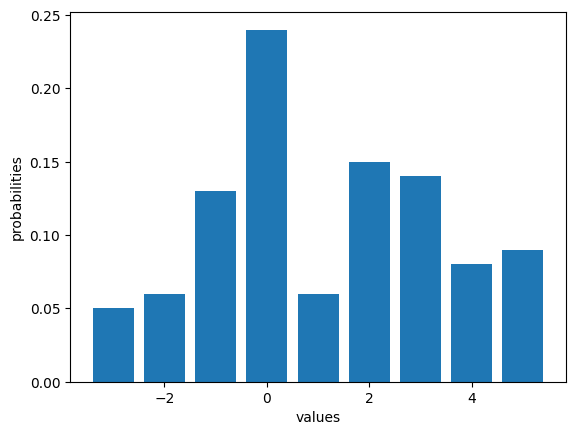

In [175]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5])
p = np.array([0.05, 0.06, 0.13, 0.24, 0.06, 0.15, 0.14, 0.08, 0.09])

plt.bar(X, p)
plt.xlabel('values')
plt.ylabel('probabilities')
print(f"{len(X) = }, {len(p) = }, {sum(p) = }")

### Функция вероятности **PMF**
Функцию, которая возвращает вероятность того, что дискретная случайная величина $X$ примет определенное значение $n$ называется **функцией вероятности** (*Probability Mass Function* - PMF):

In [135]:
def pmf(n, X, p):
    index = None
    for i in range(len(X)):
        if X[i] == n:
            index = i
            break 
    return 0 if index is None else p[index]

pmf(-1, X, p)

0.13

### Функция распределения **CDF**

**Функцией распределения** (*Cumulative Distribution Function* - CDF) случайной величины называется функция $F(x)$, определяющая вероятность того, что случайная величина $X$ в результате испытаний примент значение, меньшее $x$. Функция распределения, очевидно, является монотонной неубывающей функцией.

Определим функцию `cdf()`, которая по заданному `x` возвращает значение функции распределения данной случайной величины.

In [136]:
def cdf(x, X, p):
    probability = 0
    for i in range(len(X)):
        if X[i] < x:
            probability += p[i]
    return probability

cdf(5, X, p)

0.91

values = array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])
cdf_sequence = array([0.  , 0.  , 0.  , 0.05, 0.11, 0.24, 0.48, 0.54, 0.69, 0.83, 0.91,
       1.  , 1.  , 1.  ])


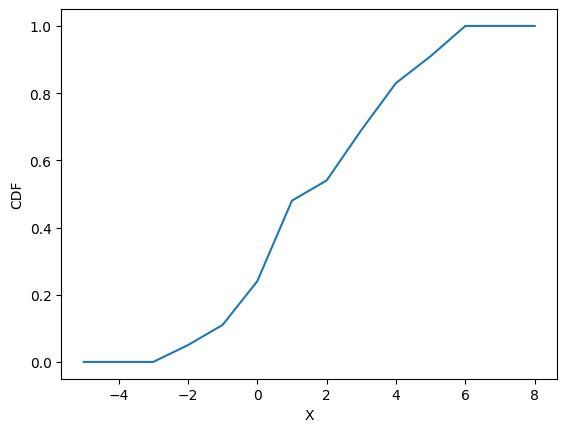

In [137]:
values = np.arange(-5, 9)
cdf_sequence = np.zeros(14)

for i in range(len(values)):
    c = cdf(values[i], X, p)
    cdf_sequence[i] = c

plt.plot(values, cdf_sequence)
plt.xlabel("X")
plt.ylabel("CDF")
print(f"{values = }\n{cdf_sequence = }")

Функция распределения $F(x)$ непрерывной случайной величины является непрерывной, кусочно-дифференцируемой функцией. 

> Вероятность $p$ того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, равна приращению функции распределения на этом интервале:
>$$
p(a \leq X \leq b) = F(a) - F(b)
$$

### Плотность вероятности **PDF**

Когда мы имеем дело с непрерывной случайной величиной, определенной на некотором открытом или закрытом промежуте, то вероятность выпадения конкретного значения является нулевой. Поэтому вместо распределения вероятностей для задания распределения случайной величины используется **плотность вероятности** (*Probability Density Function* - PDF), которая определяет вероятность выпадения значений, лежащих в некотором диапозоне.

> Если известна функция распределения $F(x)$, плотность вероятности может быть получена как производная от функции распределения.

Пусть функция распределения задана сигмоидой c $\alpha = 0.1$. Визуализируем фукнцию распределения на отрезке $[-100, 100]$:

Text(0, 0.5, 'CDF')

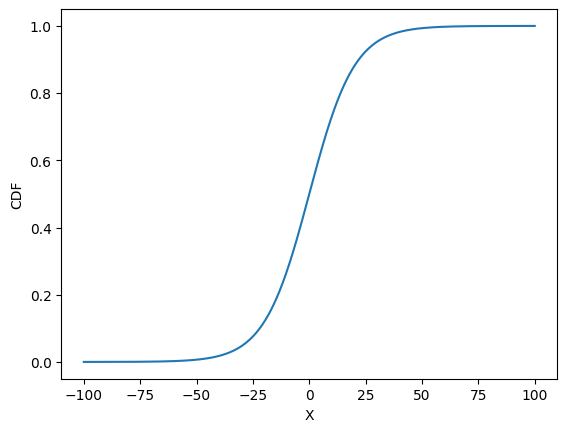

In [138]:
def sigmoid(x, alpha=0.1):
    return 1 / (1 + np.exp(-alpha * x))

segment = np.linspace(-100, 100, 1000)
cdf_sequence = np.zeros_like(segment)

for i in range(len(segment)):
    cdf_sequence[i] = sigmoid(segment[i])

plt.plot(segment, cdf_sequence)
plt.xlabel('X')
plt.ylabel('CDF')

Напишем функцию `deriv_sigmoid`, которая возвращает значение производной сигмоиды в точе `x`. Тогда мы сможем получить значения плотности вероятности на рассматриваемом отрезке `segment`:

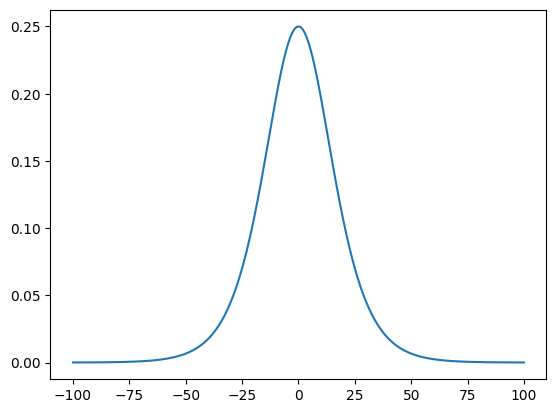

In [139]:
def deriv_sigmoid(x, alpha=0.1):
    return sigmoid(x, alpha) * (1 - sigmoid(x, alpha))

pdf = np.zeros_like(segment)
for i in range(len(segment)):
    pdf[i] = deriv_sigmoid(segment[i])

plt.plot(segment, pdf)

>Для того, чтобы по плотности вероятности $f(x)$ вычислить вероятность того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, нужно проинтегрировать плотность вероятности в прделах от $a$ до $b$:
>$$
p(a \leq X \leq b) = \int_a^b f(x) dx
$$
Так как функция распределения $F(x)$ является первообразной плотности вероятности, то
$$
\int_a^b f(x) dx = F(b) - F(a)
$$
Что соответствует описанной выше формуле для функции вероятности.

В силу $F(-\infty)=0$ и $F(\infty)=1$ интеграл по всей числовой оси:
$$
\int_{-\infty}^{\infty} f(x) dx = 1
$$
что в общем логично: в любом испытании какое нибудь число выпадет выпадет со $100\%$ вероятностью.

### Математическое ожидание

**Математическое ожидание** (*expected value*) – это среднее значение случайной величины, которое показывает, какой результат в среднем можно ожидать от повторения эксперимента много раз.

$$ \mathrm E[X]=\sum_{i=1}^n x_1p_1$$
для непрерывного распределения
$$ \mathrm E[X] = \int\limits_{-\infty}^\infty xf(x)$$
где $f(x)$ - функция плотности распределения

In [140]:
def EV(X, p):
    """Математическое ожидание"""
    return sum(X*p)

EV(X, p)

1.15

>Если распределение вероятностей случайной величины неизвестно, математическое ожидание можно получить из результатов большого количества испытаний как среднее значение всех исходов (*sample mean*):
>$$ \overline x = \frac{1}{n} \sum_{i=1}^n x_i $$

In [141]:
# сгенерируем множество исходов заданной случайной величины
sample = np.random.choice(X, size=100001, p=p)
print(sample[:20])
sample.mean()

[ 0  3  2 -1  1  4  3  4 -2 -3  5 -2  5  0 -2  0  2 -3  2  0]


1.1522584774152258

### Отклонение случайной величины
**Отклонение** (*deviation*) случайной величины представляет собой рзность случайной величины и его математического ожидания:
$$ X - \mathrm E[X] $$
Вероятность отклонения $ x_i - \mathrm E[X]$ равно вероятности $p_i$ значения $x_i$.

Математическое ожидание отклонения равно нулю, так как отклонения в положительную сторону компенсируются отклонениями в отрицательную сторону (их значения отрицательны).

In [142]:
deviations = X-EV(X, p)
print(deviations)
EV(deviations, p)   # Математическое ожидание отклонения равно нулю

[-4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85]


1.6653345369377348e-16

### Дисперсия
**Дисперсией** (*Variance*) дискретной случайной величины называется математическое ожидание *квадрата* отклонения случайной величины от ее математического ожидания:
$$ \mathrm{Var}(X) = \mathrm E[(X - \mathrm E[X])^2] = \sum {(x_i - \mathrm E[X])^2p_i} $$

In [143]:
def var(X, p):
    ev = EV(X, p)
    variance = 0
    for i in range(len(X)):
        variance += ((X[i] - ev) ** 2) * p[i]
    return variance

var(X, p)

4.947500000000001

### Выборочная дисперсия

**Выборочная дисперсия** (*Sample Variance*) - дисперсия, оцениваемая эмпирически на основе данных выборки
$$ \tilde S_X^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 $$

**Несмещённая** (*unbiased*) выборочная дисперсия:
$$ S_X^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline x)^2 $$
Деление на $n-1$ вместо $n$ дает чуть более высокую оценку $ S_X^2 = \frac{n}{n-1} \tilde S_X^2$. При больших $n$ несмещенная дисперсия дает лучшую оценку, чем смещенная.

In [144]:
def var(sample):
    ev = sample.mean()
    variance = 0
    for s in sample:
        variance += (s - ev) ** 2

    return variance / len(sample)

var(sample)

4.95510757315331

Дисперсию также можно вычислить при помощи функции `var()` из библиотеки NumPy, либо при помощи одноименного метода массива (объекта класса `ndarray`).

In [145]:
np.var(sample)     # два вариана вычисления
sample.var()       # дисперсии с numpy

4.955107573153025

### Стандартное отклонение
**Стандартное отклонение** (*standard deviation*) или **среднеквадратическое отклонение**  – это мера того, насколько значения случайной величины разбросаны относительно её среднего значения. Стандартное отклонение вычисляется как квадратный корень от дисперсии:
$$
\sigma_X = \sqrt{\mathrm{Var}(X)}
$$

Вычисление при помощий функций и методов NumPy:

In [146]:
np.std(sample)     # два вариана вычисления
sample.std()       # среднеквадратического отклонения c numpy

2.226007091891898

### Мода

**Модой** (*Mode*) дискретной случайной величины называется ее наиболее вероятное значение. При экспериментальном вычислении, мода соответствует наиболее часто выпадаемой величине.

Если известна функция распределения случайной величины, то моду можно вычислить как максимум фукнции.

Предположим, что функция распределения неизвестна, и имеем дело с выборкой дискретной случайной величины. Моду в этом случае можно оценить, найдя величину, которая выпадала чаще всего. Для этого создадим словарь, ключами которого будут величины в выборке, а по ключу будут количество повяления этой величины в выборке:

In [165]:
dictionary = dict()
for n in sample:
    if n in dictionary:
        dictionary[n] += 1
    else:
        dictionary[n] = 1

dictionary

{0: 24212,
 3: 13892,
 2: 14822,
 -1: 12899,
 1: 6009,
 4: 8073,
 -2: 6075,
 -3: 4930,
 5: 9089}

Теперь остается найти величину, которая больше остальных появлялась в выборке. Для этого конвертируем ключи и значения словаря в массивы NumPy, используя функцию `fromiter()`, затем найдем индекс максимального значения в массиве при помощи функции `argmax()`. По этому индексу в массиве ключей получим величину, которая чаще всего появлялась в выборке, т.е. моду.

In [167]:
frequencies = np.fromiter(dictionary.values(), dtype=int)
values = np.fromiter(dictionary.keys(), dtype=int)
index = np.argmax(frequencies)
values[index]

0

Проще можно было бы использовать встроенную функцию `max()`, передав в аргумент `key` по ссылке функцию `dictionary.get()`, которая возвращает значение по заданному ключу.

In [ ]:
max(dictionary, key=dictionary.get)

Убедимся, что распределение выборки случайной величины соответствует заданному выше распределению вероятностей, по которому и генерировалась эта выборка: 

Text(0, 0.5, 'frequencies')

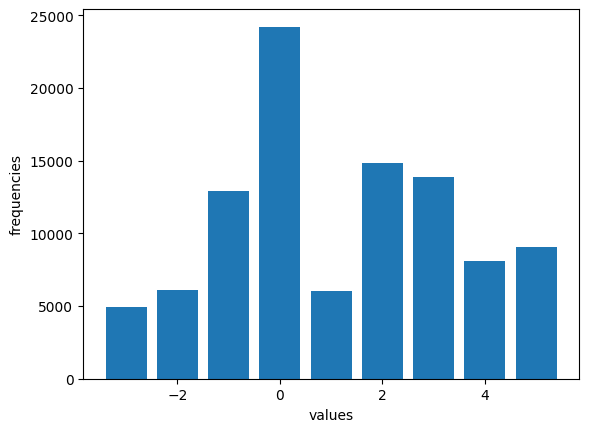

In [173]:
plt.bar(values, frequencies)
plt.xlabel('values')
plt.ylabel('frequencies')

В случае непрерывной случайной величины такой метод не подойдет, так как каджое величина в выборке вообще говоря может быть уникальной. Поэтому для оценки моды непрерывной случайной величины следует воспользоваться гистограммой, как это будет рассмотренно ниже, для оценки моды логнормального распределения.

### Медиана
**Медианой** (*Median*) случайной величины называется такое значение $m$, для которого вероятность получить большее значение равно вероятности получить меньшее значение ($p=0.5$). Если случайная величина является непрерывной, то медиана может быть представлена уравнением:
$$
p(X \leq m) = F(m) = \int_{- \infty}^m f(x)dx = \frac{1}{2}
$$
где $f(x)$ – плотность вероятности случайной величнины.

Как было показано ниже, интеграл по всей области $(-\infty, \infty)$ всегда равен $1$. Значит интеграл 

$$ \int_{m}^{\infty} f(x)dx $$
Также должен равняться $1/2$. Медиана таким обарзом расположена так, что разбивает область под функцией плотности вероятности на две области с равными площадями.

>Для экспериментальный вычисления медианы необходимо в первую очередь упорядочить выборку по возрастанию. Если число элементов выборки нечетное, то нужно выбрать элемент, расположенный ровно по середине упорядоченной выборки. Если же число элементов четное, то следует выбрать два центральных элемента и взять от них среднее.

In [151]:
ordered = np.sort(sample, kind='mergesort')

n = len(ordered)

if n % 2 == 0:
    median = ordered[int(n/2)]
else:
    median = ordered[int(np.ceil(n/2))]

median

1

## Логнормальное распределение

Text(0, 0.5, 'PDF')

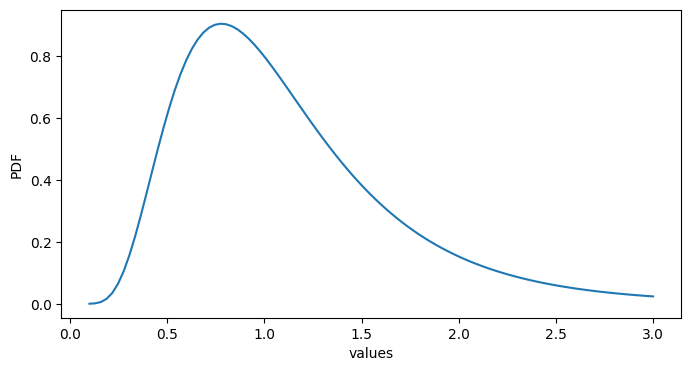

In [176]:
def lognormal(x, mu=0., sigma=0.5):
    result = np.zeros_like(x)
    for i in range(len(x)):
        denominator = (x[i] * sigma * np.sqrt(2 * np.pi))
        numerator = np.exp(-((np.log(x[i]) - mu)**2) / (2 * sigma**2))
        result[i] = numerator / denominator
    return result

space = np.linspace(0.1, 3, 100).astype(np.float32)
p = lognormal(space)
plt.figure(figsize=(8, 4))
plt.plot(space, p)
plt.xlabel('values')
plt.ylabel('PDF')

In [179]:
data = np.random.lognormal(mean=0., sigma=0.5, size=1000)

(array([ 34., 113., 179., 177., 149., 102.,  94.,  45.,  33.,  18.,  14.,
         12.,  10.,   4.,   3.,   5.,   2.,   0.,   1.,   1.,   1.,   1.,
          1.,   1.]),
 array([0.21380282, 0.41595555, 0.61810827, 0.820261  , 1.02241372,
        1.22456645, 1.42671917, 1.6288719 , 1.83102462, 2.03317735,
        2.23533007, 2.4374828 , 2.63963552, 2.84178825, 3.04394097,
        3.2460937 , 3.44824642, 3.65039915, 3.85255187, 4.0547046 ,
        4.25685732, 4.45901005, 4.66116277, 4.8633155 , 5.06546822]),
 <BarContainer object of 24 artists>)

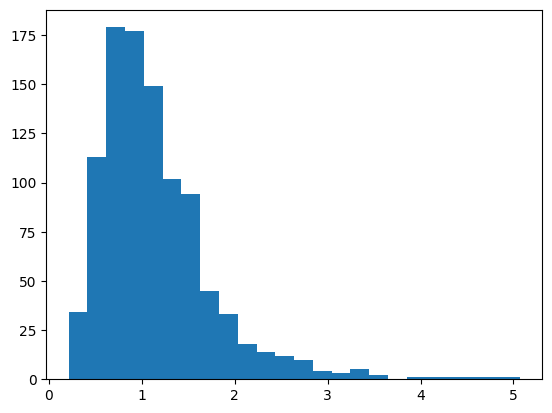

In [182]:
plt.hist(data, bins=24, density=False)

In [154]:
ln_sample.mean()

1.1178997888440576

In [155]:
lognormal([space[p.argmax()]])

array([0.90404475], dtype=float32)

In [156]:
ordered = np.sort(ln_sample, kind='mergesort')

n = len(ordered)

if n % 2 == 0:
    median = ordered[int(n/2)]
else:
    median = ordered[int(np.ceil(n/2))]

median

1.008031792250269

In [157]:
np.histogram(ln_sample, 24)

(array([ 27,  97, 146, 179, 142, 128,  95,  58,  40,  25,  22,  11,   5,
          5,   5,   3,   3,   2,   3,   0,   2,   0,   1,   1], dtype=int64),
 array([0.17091169, 0.36192754, 0.5529434 , 0.74395925, 0.93497511,
        1.12599097, 1.31700682, 1.50802268, 1.69903854, 1.89005439,
        2.08107025, 2.2720861 , 2.46310196, 2.65411782, 2.84513367,
        3.03614953, 3.22716539, 3.41818124, 3.6091971 , 3.80021296,
        3.99122881, 4.18224467, 4.37326052, 4.56427638, 4.75529224]))

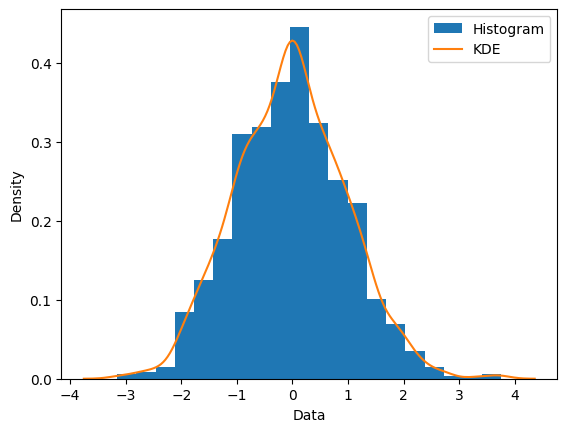

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# generate 1000 data points from a normal distribution
data = np.random.normal(0, 1, 1000)

# plot a histogram with 20 bins
plt.hist(data, bins=20, density=True, label="Histogram")

# plot a kernel density estimate with Gaussian kernel
sns.kdeplot(data, bw_method=0.2, label="KDE")

# add labels and legend
plt.xlabel("Data")
plt.ylabel("Density")
plt.legend()

# show the plot
plt.show()